https://github.com/jkeung/ds5/tree/master/challenges/01-benson

In [2]:
from __future__ import division
import sys
import csv
import pandas as pd
from datetime import datetime
from pprint import pprint
from collections import defaultdict
import dateutil.parser

In [6]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150905.txt
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150912.txt


###Challenge 1

* Open up a new IPython notebook
* Download a few MTA turnstile data files
* Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [3]:
#Read in data from a set of dates and append to dataframe
dates = ['150905', '150912']
df = pd.DataFrame()
for date in dates:
    df = df.append(pd.read_csv("turnstile_{0}.txt".format(date)), ignore_index = True)


In [4]:
#Set the names of the columns
df.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME','DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']

In [5]:
#Create the tuplekey for turnstile from C/A, UNIT, SCP, and STATION
df['TUPLEKEY'] = zip(df['C/A'], df['UNIT'], df['SCP'], df['STATION'])

In [6]:
#Check size of the df
df.shape

(385032, 12)

In [7]:
df.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TUPLEKEY
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,08/29/2015,00:00:00,REGULAR,5287475,1788076,"(A002, R051, 02-00-00, LEXINGTON AVE)"
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,08/29/2015,04:00:00,REGULAR,5287519,1788086,"(A002, R051, 02-00-00, LEXINGTON AVE)"
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,08/29/2015,08:00:00,REGULAR,5287542,1788108,"(A002, R051, 02-00-00, LEXINGTON AVE)"
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,08/29/2015,12:00:00,REGULAR,5287679,1788184,"(A002, R051, 02-00-00, LEXINGTON AVE)"
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,08/29/2015,16:00:00,REGULAR,5287935,1788257,"(A002, R051, 02-00-00, LEXINGTON AVE)"


In [8]:
#Create the values for the first dictionary by zipping columns together and convet to list
df['VALUE'] = zip(df['DIVISION'], df['DATE'], df['TIME'], df['DESC'], df['ENTRIES'], df['EXITS'])
df['VALUE'] = df['VALUE'].apply(lambda x: list(x))

In [12]:
#Create dict1 from the TUPLEKEY and VALUE
dict1 = {k: g["VALUE"].tolist() for k,g in df.groupby("TUPLEKEY")}
dict1[('A002','R051','02-00-00','LEXINGTON AVE')]

[['BMT', '08/29/2015', '00:00:00', 'REGULAR', 5287475, 1788076],
 ['BMT', '08/29/2015', '04:00:00', 'REGULAR', 5287519, 1788086],
 ['BMT', '08/29/2015', '08:00:00', 'REGULAR', 5287542, 1788108],
 ['BMT', '08/29/2015', '12:00:00', 'REGULAR', 5287679, 1788184],
 ['BMT', '08/29/2015', '16:00:00', 'REGULAR', 5287935, 1788257],
 ['BMT', '08/29/2015', '20:00:00', 'REGULAR', 5288201, 1788304],
 ['BMT', '08/30/2015', '00:00:00', 'REGULAR', 5288349, 1788328],
 ['BMT', '08/30/2015', '04:00:00', 'REGULAR', 5288373, 1788330],
 ['BMT', '08/30/2015', '08:00:00', 'REGULAR', 5288391, 1788350],
 ['BMT', '08/30/2015', '12:00:00', 'REGULAR', 5288484, 1788411],
 ['BMT', '08/30/2015', '16:00:00', 'REGULAR', 5288682, 1788463],
 ['BMT', '08/30/2015', '20:00:00', 'REGULAR', 5288923, 1788516],
 ['BMT', '08/31/2015', '00:00:00', 'REGULAR', 5289038, 1788544],
 ['BMT', '08/31/2015', '04:00:00', 'REGULAR', 5289048, 1788544],
 ['BMT', '08/31/2015', '08:00:00', 'REGULAR', 5289085, 1788627],
 ['BMT', '08/31/2015', '1

### Challenge 2

* Let's turn this into a time series.

* For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

* This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

* Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [10]:
#Create a column DATETIME which is a timestamp
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [15]:
#Create INCR_ENTRIES, which is the incremental entries per time period grouped by the TUPLEKEY
df['INCR_ENTRIES'] = df['ENTRIES'] - df.groupby('TUPLEKEY')['ENTRIES'].shift(1)

In [15]:
#Create a new value of the dictionary which has only DATETIME and INCR_ENTRIES and convert to list
df['DATETIMEENTRIESVAL'] = zip(df['DATETIME'], df['INCR_ENTRIES'])
df['DATETIMEENTRIESVAL'] = df['DATETIMEENTRIESVAL'].apply(lambda x: list(x))

In [16]:
#Create dict2 from the TUPLEKEY and DATETIMEENTRIESVAL
dict2 = {k:g['DATETIMEENTRIESVAL'].tolist() for k, g in df.groupby('TUPLEKEY')}
#Print the value of this particular turnstile
dict2[('A002','R051','02-00-00','LEXINGTON AVE')]

[[Timestamp('2015-08-29 00:00:00'), nan],
 [Timestamp('2015-08-29 04:00:00'), 44.0],
 [Timestamp('2015-08-29 08:00:00'), 23.0],
 [Timestamp('2015-08-29 12:00:00'), 137.0],
 [Timestamp('2015-08-29 16:00:00'), 256.0],
 [Timestamp('2015-08-29 20:00:00'), 266.0],
 [Timestamp('2015-08-30 00:00:00'), 148.0],
 [Timestamp('2015-08-30 04:00:00'), 24.0],
 [Timestamp('2015-08-30 08:00:00'), 18.0],
 [Timestamp('2015-08-30 12:00:00'), 93.0],
 [Timestamp('2015-08-30 16:00:00'), 198.0],
 [Timestamp('2015-08-30 20:00:00'), 241.0],
 [Timestamp('2015-08-31 00:00:00'), 115.0],
 [Timestamp('2015-08-31 04:00:00'), 10.0],
 [Timestamp('2015-08-31 08:00:00'), 37.0],
 [Timestamp('2015-08-31 12:00:00'), 174.0],
 [Timestamp('2015-08-31 16:00:00'), 272.0],
 [Timestamp('2015-08-31 20:00:00'), 845.0],
 [Timestamp('2015-09-01 00:00:00'), 215.0],
 [Timestamp('2015-09-01 04:00:00'), 12.0],
 [Timestamp('2015-09-01 08:00:00'), 39.0],
 [Timestamp('2015-09-01 12:00:00'), 199.0],
 [Timestamp('2015-09-01 16:00:00'), 280.0],

###Challenge 3

n accounts for every 4 hours, but for some stations they have their own time intervals

* These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [16]:
#Create a new dataframe and drop the ENTRIES and EXITS, so that we only have INCR_ENTRIES left
df2 = df.copy()
df2 = df2.drop('ENTRIES',1)
df2 = df2.drop('EXITS',1)


In [19]:
#Print out each turnstiles incremental entries by day
df2.groupby(['TUPLEKEY', 'DATE']).sum()

INCR_ENTRIES
TUPLEKEY                               DATE                    
(A002, R051, 02-00-00, LEXINGTON AVE)  08/29/2015           726
                                       08/30/2015           722
                                       08/31/2015          1453
                                       09/01/2015          1627
                                       09/02/2015          1590
                                       09/03/2015          1759
                                       09/04/2015          1634
                                       09/05/2015          1009
                                       09/06/2015           760
                                       09/07/2015           781
                                       09/08/2015          1600
                                       09/09/2015          1724
                                       09/10/2015          1748
                                       09/11/2015          1813
(A002, R051, 02-00-01, LEXINGTON AVE)  08/29/2015           690
                                       08/30/2015           680
                                       08/31/2015          1231
                                       09/01/2015          1288
                                       09/02/2015          1291
                                       09/03/2015          1242
                                       09/04/2015          1312
                                       09/05/2015           878
                                       09/06/2015           684
                                       09/07/2015           697
                                       09/08/2015          1269
                                       09/09/2015          1413
                                       09/10/2015          1443
                                       09/11/2015          1531
(A002, R051, 02-03-00, LEXINGTON AVE)  08/29/2015           368
                                       08/30/2015           372
...                                                         ...
(TRAM2, R469, 00-03-01, RIT-ROOSEVELT) 09/10/2015           207
                                       09/11/2015           308
(TRAM2, R469, 00-05-00, RIT-ROOSEVELT) 08/29/2015             2
                                       08/30/2015             1
                                       08/31/2015             2
                                       09/01/2015             1
                                       09/02/2015             0
                                       09/03/2015             2
                                       09/04/2015             0
                                       09/05/2015             2
                                       09/06/2015             0
                                       09/07/2015             1
                                       09/08/2015             1
                                       09/09/2015             1
                                       09/10/2015             1
                                       09/11/2015             1
(TRAM2, R469, 00-05-01, RIT-ROOSEVELT) 08/29/2015             0
                                       08/30/2015             0
                                       08/31/2015             0
                                       09/01/2015             0
                                       09/02/2015             0
                                       09/03/2015             0
                                       09/04/2015             0
                                       09/05/2015             0
                                       09/06/2015             0
                                       09/07/2015             0
                                       09/08/2015             0
                                       09/09/2015             0
                                       09/10/2015             0
                                       09/11/2015             0

[63866 rows x 1 co

###Challenge 4

* We will plot the daily time series for a turnstile.

* In ipython notebook, add this to the beginning of your next cell:
```
%matplotlib inline
```

* This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with
```
import matplotlib.pyplot as plt
```
* Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
```
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
```

In [20]:
#Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

In [21]:
#Change DATE from a string to a date
df2['DATE'] = df2['DATE'].apply(lambda x: dateutil.parser.parse(x))

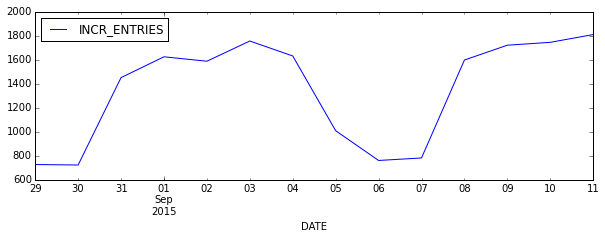

In [28]:
#Plot a station's incremental entries by date
#df2[df2['TUPLEKEY']==("A002", "R051", "02-00-00", "LEXINGTON AVE")].groupby(['DATE']).sum().plot(figsize=(10,3))
df2[df2['TUPLEKEY']==("A002", "R051", "02-00-00", "LEXINGTON AVE")].groupby(['DATE']).sum().plot(figsize=(10,3))

###Challenge 5

* So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [29]:
#Create a new tuple key which consists of C/A, UNIT, and STATION
df['TUPLEKEY2'] = zip(df['C/A'], df['UNIT'], df['STATION'])

In [32]:
#Copy dataframe and drop ENTRIES and EXITS columns
df3 = df.copy()
df3 = df3.drop('ENTRIES',1)
df3 = df3.drop('EXITS',1)
#df3.columns

In [34]:
#Print out new dataframe
# @Grader: How can I turn this into a dictionary??
df3.groupby(['TUPLEKEY2', 'DATE']).sum()

INCR_ENTRIES
TUPLEKEY2                    DATE                    
(A002, R051, LEXINGTON AVE)  08/29/2015          8413
                             08/30/2015          8752
                             08/31/2015         14926
                             09/01/2015         16303
                             09/02/2015         16422
                             09/03/2015         16669
                             09/04/2015         16084
                             09/05/2015         10729
                             09/06/2015          8950
                             09/07/2015          8540
                             09/08/2015         15902
                             09/09/2015         17527
                             09/10/2015         17781
                             09/11/2015         17980
(A006, R079, 5 AVE-59 ST)    08/29/2015          6836
                             08/30/2015          5834
                             08/31/2015         12219
                             09/01/2015         13144
                             09/02/2015         13289
                             09/03/2015         13202
                             09/04/2015         11792
                             09/05/2015          7453
                             09/06/2015          6407
                             09/07/2015          6199
                             09/08/2015         12872
                             09/09/2015         13765
                             09/10/2015         14177
                             09/11/2015         14004
(A007, R079, 5 AVE-59 ST)    08/29/2015          3892
                             08/30/2015          3567
...                                               ...
(S102, R165, TOMPKINSVILLE)  09/10/2015           768
                             09/11/2015           873
(TRAM1, R468, RIT-MANHATTAN) 08/29/2015          3820
                             08/30/2015          4464
                             08/31/2015          3723
                             09/01/2015          3679
                             09/02/2015          3754
                             09/03/2015          3639
                             09/04/2015          3856
                             09/05/2015          4785
                             09/06/2015          4640
                             09/07/2015          4613
                             09/08/2015          3688
                             09/09/2015          3847
                             09/10/2015          3344
                             09/11/2015          3983
(TRAM2, R469, RIT-ROOSEVELT) 08/29/2015          6128
                             08/30/2015          6168
                             08/31/2015          3630
                             09/01/2015          3598
                             09/02/2015          3727
                             09/03/2015          3610
                             09/04/2015          3812
                             09/05/2015          6738
                             09/06/2015          6523
                             09/07/2015          6444
                             09/08/2015          3999
                             09/09/2015          3795
                             09/10/2015          3298
                             09/11/2015          4028

[10149 rows x 1 columns]

###Challenge 6

* Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [28]:
# Creates a time series of data for each station
df3.groupby(['STATION', 'DATE']).sum()

INCR_ENTRIES
STATION         DATE                    
1 AVE           08/29/2015         14240
                08/30/2015         14727
                08/31/2015         19183
                09/01/2015         21143
                09/02/2015         21969
                09/03/2015         21935
                09/04/2015         23076
                09/05/2015         17067
                09/06/2015         14993
                09/07/2015         13369
                09/08/2015         20464
                09/09/2015         24194
                09/10/2015         25363
                09/11/2015         25625
103 ST          08/29/2015         13575
                08/30/2015         13198
                08/31/2015         21802
                09/01/2015         23452
                09/02/2015         23627
                09/03/2015         23918
                09/04/2015         23172
                09/05/2015         15429
                09/06/2015         13583
                09/07/2015         13951
                09/08/2015         23981
                09/09/2015         26173
                09/10/2015         27192
                09/11/2015         27158
103 ST-CORONA   08/29/2015         13627
                08/30/2015         12104
...                                  ...
WORLD TRADE CTR 09/10/2015         15564
                09/11/2015         15517
YORK ST         08/29/2015          5861
                08/30/2015          6088
                08/31/2015          8587
                09/01/2015          8812
                09/02/2015          8875
                09/03/2015          8878
                09/04/2015          8275
                09/05/2015          3805
                09/06/2015          3043
                09/07/2015          2771
                09/08/2015          8572
                09/09/2015          9416
                09/10/2015          9721
                09/11/2015          9461
ZEREGA AVE      08/29/2015          1142
                08/30/2015           969
                08/31/2015          2303
                09/01/2015          2374
                09/02/2015          2238
                09/03/2015          2247
                09/04/2015          2119
                09/05/2015          1143
                09/06/2015           974
                09/07/2015          1090
                09/08/2015          2393
                09/09/2015          2602
                09/10/2015          2580
                09/11/2015          2513

[5390 rows x 1 columns]

###Challenge 7

Plot the time series for a station.

In [29]:
#Set the DATE column to a date
df3['DATE'] = df3['DATE'].apply(lambda x: dateutil.parser.parse(x))

In [30]:
#Check values for a STATION
df3[df3['STATION'] == '103 ST'].groupby(['DATE']).sum()

,INCR_ENTRIES
DATE,
2015-08-29,13575
2015-08-30,13198
2015-08-31,21802
2015-09-01,23452
2015-09-02,23627
2015-09-03,23918
2015-09-04,23172
2015-09-05,15429
2015-09-06,13583


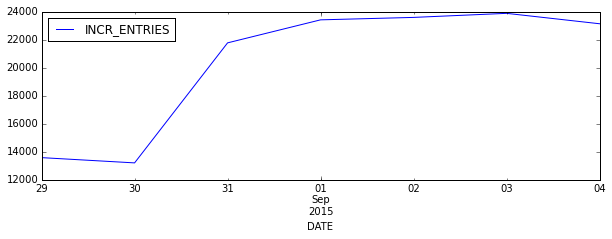

In [24]:
#Plots the incremental entries for a particular station
df3[df3['STATION'] == '103 ST'].groupby(['DATE']).sum().plot(figsize=(10,3))

###Challenge 8

* Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [31]:
#Create a column DAY that will label the days 0:6, 0 for Sunday 6 for Saturday
from datetime import datetime
df3['DAY'] = df3['DATE'].apply(lambda x: x.weekday())
df3['DATE'] = df3['DATE'].apply(pd.datetools.normalize_date)

In [32]:
#Create a week column that represents the week number in a year
df3['WEEK'] = df3['DATE'].dt.week

In [33]:
df3[df3['STATION']=='103 ST'].groupby('WEEK').sum()

,INCR_ENTRIES,DAY
WEEK,,
35,26773,990
36,144983,1896
37,118455,991


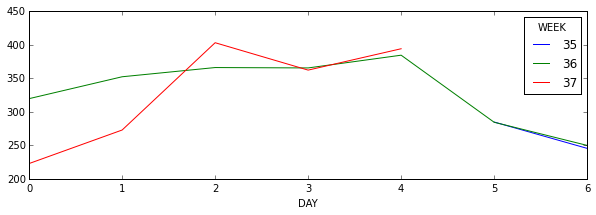

In [34]:
#Sets the columns as WEEK
#Sets index as DAY
df3[df3['STATION']=='1 AVE'].pivot_table(index = 'DAY', columns = 'WEEK', values = 'INCR_ENTRIES').plot(figsize=(10,3))

### Challenge 9

* Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [38]:
#Copy the previous dataframe and drop DAY column
df4 = df3.copy()
df4 = df4.drop('DAY',1)
df4 = df4.drop('WEEK',1)

In [39]:
#Create a list of stations and create date and station filter
stationlist = ['1 AVE', '103 ST', 'FULTON ST', 'YORK ST']
datecondition = (df4['DATETIME'] >= '08-01-2015 00:00:00') & (df4['DATETIME'] <= '09-01-2015 00:00:00') 
stationcondition = (df4['STATION'].isin(stationlist))

df4[datecondition & stationcondition].groupby(['STATION']).sum()

,INCR_ENTRIES
STATION,
1 AVE,51519
103 ST,48575
FULTON ST,122446
YORK ST,20536


###Challenge 10

* Make a single list of these total ridership values and plot it with
```
plt.hist(total_ridership_counts)
```
to get an idea about the distribution of total ridership among different stations.

* This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

In [40]:
#Create ridership dataframe that is grouped by STATION, keep only positive values
ridership = df4[datecondition].groupby(['STATION']).sum()
ridership = ridership[ridership['INCR_ENTRIES']>=0]
ridership

,INCR_ENTRIES
STATION,
1 AVE,51519
103 ST,48575
103 ST-CORONA,45648
104 ST,3857
110 ST-CATHEDRL,26623
110 ST-CPN,20092
111 ST,31253
116 ST,71703
116 ST-COLUMBIA,25499


In [41]:
#Create a list for indices, and a list for total_ridership
total_ridership_list = pd.Series(ridership['INCR_ENTRIES']).tolist()
indices = range(len(total_ridership_list))

<Container object of 381 artists>

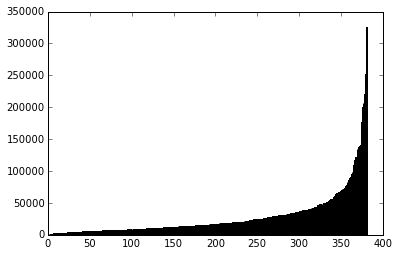

In [42]:
#Plot the total_ridership counts in ascending order
# @Grader: How do I get the station that ties with each of these counts?
plt.bar(indices, sorted(total_ridership_list))